# System Trends Dashboard

This notebook visualizes key system metrics over time to help identify trends, anomalies, and potential early warning signs for predictive maintenance. Update the data path as needed to point to your processed or raw system metrics files.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = '../data/processed_logs/combined_system_metrics.json'
if not os.path.exists(data_path):
    print(f"File not found: {data_path}")
else:
    df = pd.read_json(data_path)
    print(f"Loaded data shape: {df.shape}")
    display(df.head())

Loaded data shape: (7351, 10)


,Timestamp,% processor time,% privileged time,processor queue length,pages_sec,committed bytes,avg_ disk queue length,% free space,bytes total_sec,source
0,2025-06-20 00:00:00,52.483571,12.933685,0.696567,9.233209,1.205360e+10,0.107841,28.985433,654.557703,system_metrics
1,2025-06-20 00:00:00,52.483571,4.404422,1.014715,36.170449,1.265817e+10,0.097287,41.227641,1086.536736,system_metrics
2,2025-06-20 00:01:00,49.312152,4.699986,1.258322,12.295752,1.054570e+10,0.035154,42.791054,805.898912,system_metrics
3,2025-06-20 00:01:00,49.315623,10.456026,1.228843,12.374808,1.184065e+10,0.114062,38.893698,1192.581972,system_metrics
4,2025-06-20 00:02:00,53.252332,6.764865,0.373752,30.363029,1.231336e+10,0.174480,41.227586,1376.675699,system_metrics


## Visualize System Metrics Over Time

The following plots show time series trends for key system metrics. These visualizations help identify normal behavior, anomalies, and pre-failure patterns.

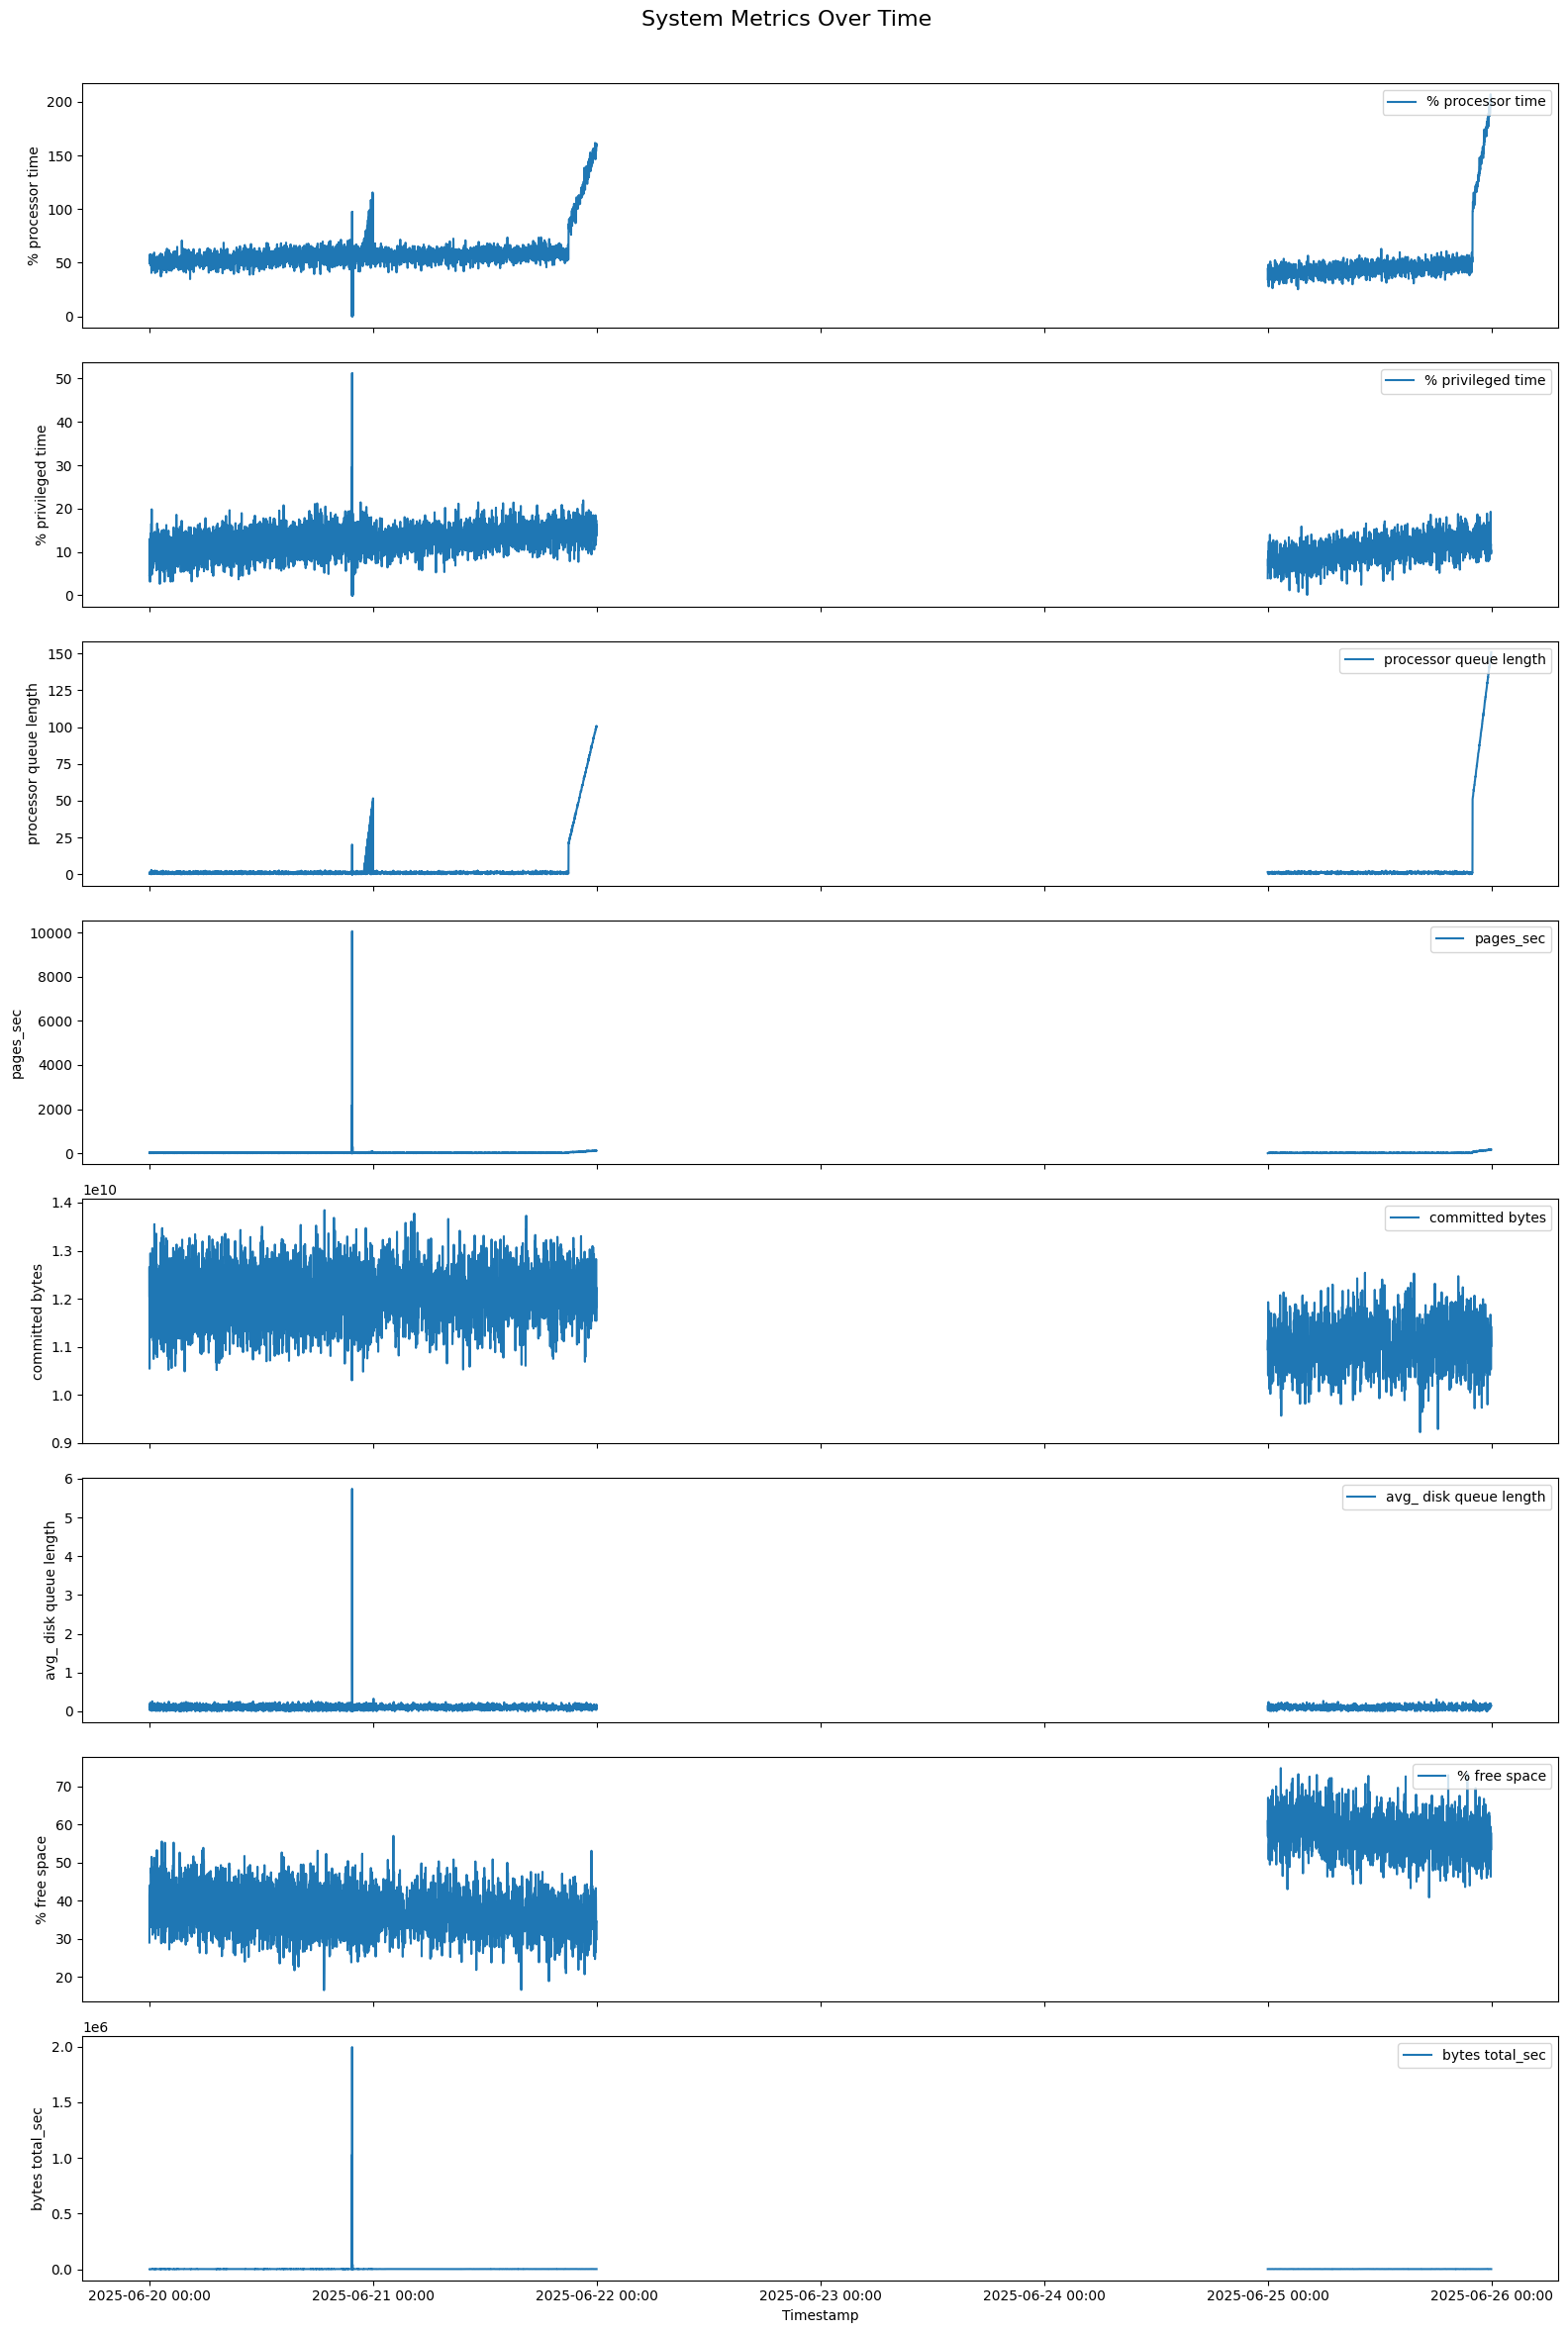

In [2]:
# Plot time series for each key metric
import matplotlib.dates as mdates

metric_cols = [
    '% processor time', '% privileged time', 'processor queue length', 'pages_sec',
    'committed bytes', 'avg_ disk queue length', '% free space', 'bytes total_sec'
]

if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    fig, axes = plt.subplots(len(metric_cols), 1, figsize=(16, 3*len(metric_cols)), sharex=True)
    for i, col in enumerate(metric_cols):
        if col in df.columns:
            axes[i].plot(df['Timestamp'], df[col], label=col)
            axes[i].set_ylabel(col)
            axes[i].legend(loc='upper right')
            axes[i].xaxis.set_major_locator(mdates.AutoDateLocator())
            axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xlabel('Timestamp')
    plt.suptitle('System Metrics Over Time', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
else:
    print('Timestamp column not found in data.')

## Correlation Analysis

The following heatmap shows the correlation between different system metrics. High correlation may indicate redundancy or related system behaviors.

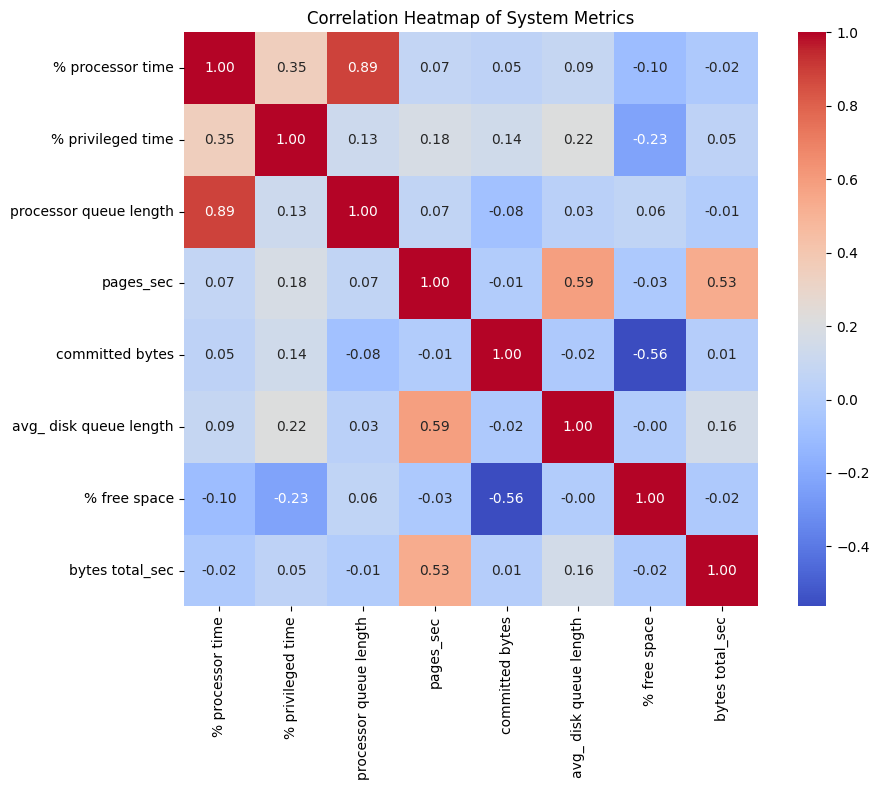

In [3]:
# Plot correlation heatmap for system metrics
import numpy as np

corr_df = df[metric_cols].corr() if all(col in df.columns for col in metric_cols) else df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of System Metrics')
plt.tight_layout()
plt.show()

## Anomaly Detection

This section highlights potential anomalies or outliers in system metrics, which may indicate abnormal system behavior or early warning signs.

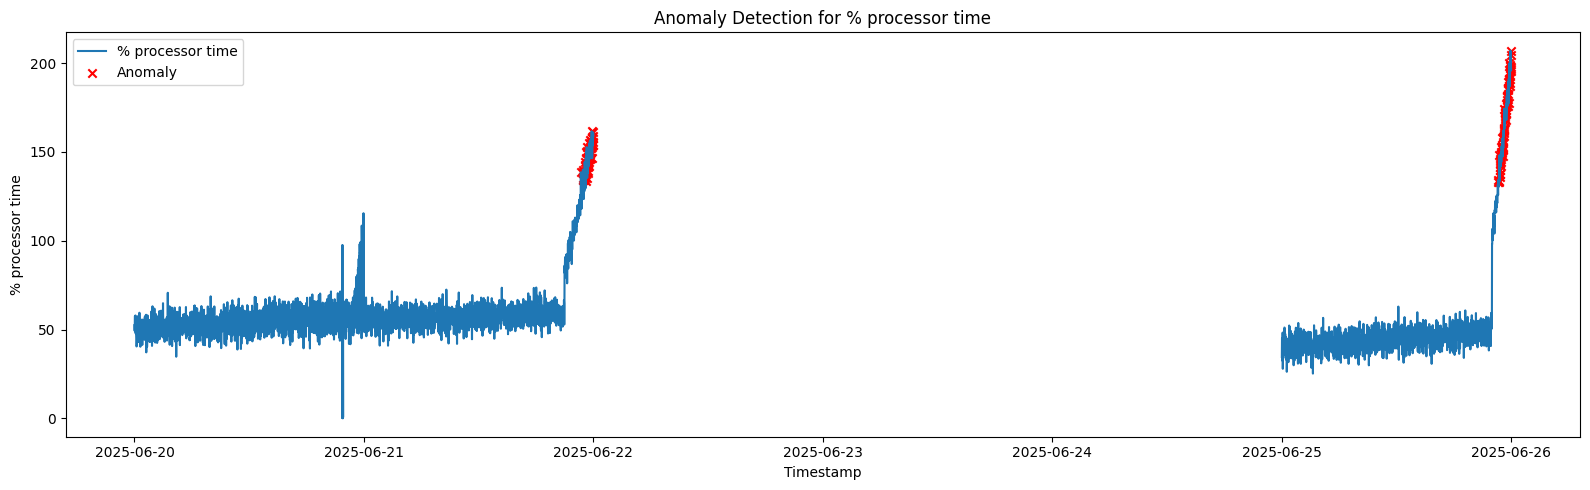

Number of anomalies detected: 143


In [4]:
# Simple anomaly detection using z-score for a selected metric
from scipy.stats import zscore

selected_metric = '% processor time'
if selected_metric in df.columns:
    df['zscore'] = zscore(df[selected_metric].fillna(0))
    anomaly_threshold = 3
    anomalies = df[np.abs(df['zscore']) > anomaly_threshold]
    plt.figure(figsize=(16, 5))
    plt.plot(df['Timestamp'], df[selected_metric], label=selected_metric)
    plt.scatter(anomalies['Timestamp'], anomalies[selected_metric], color='red', label='Anomaly', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel(selected_metric)
    plt.title(f'Anomaly Detection for {selected_metric}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f"Number of anomalies detected: {len(anomalies)}")
else:
    print(f"{selected_metric} not found in data.")